In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv('loan_data.csv')

In [58]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [59]:
df.shape

(45000, 14)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [61]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [62]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [63]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [64]:
df.duplicated().sum()

0

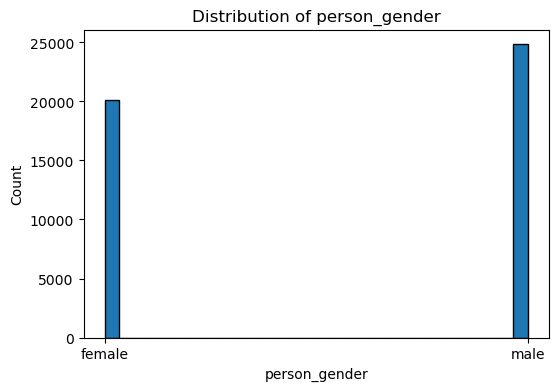

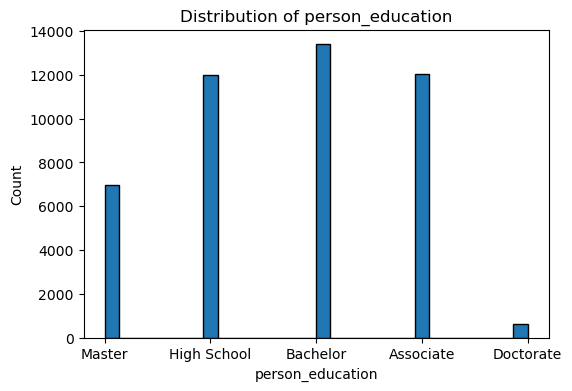

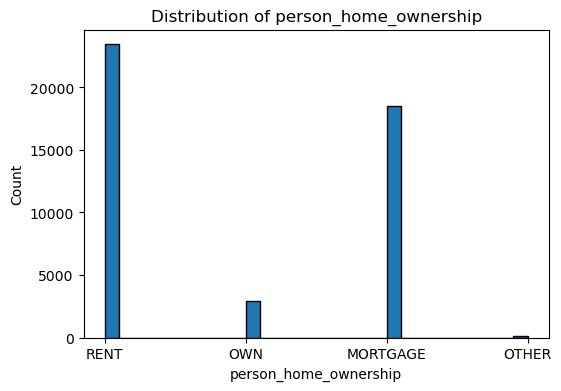

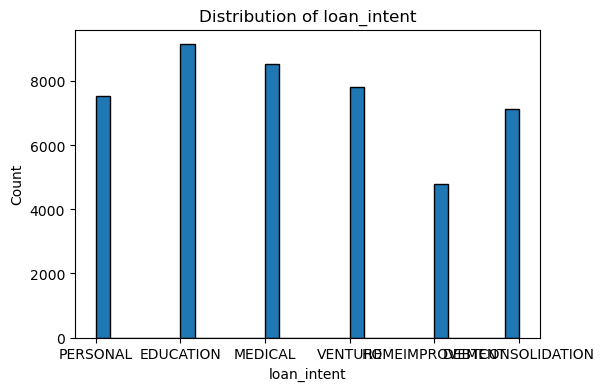

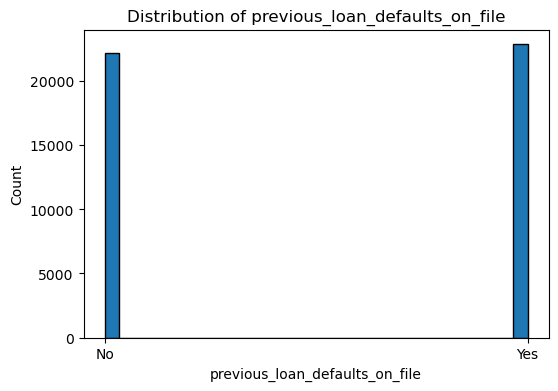

In [65]:
cat_cols=df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4)) 
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f"Distribution of {col}") 
    plt.xlabel(col) 
    plt.ylabel("Count")
    plt.show()    

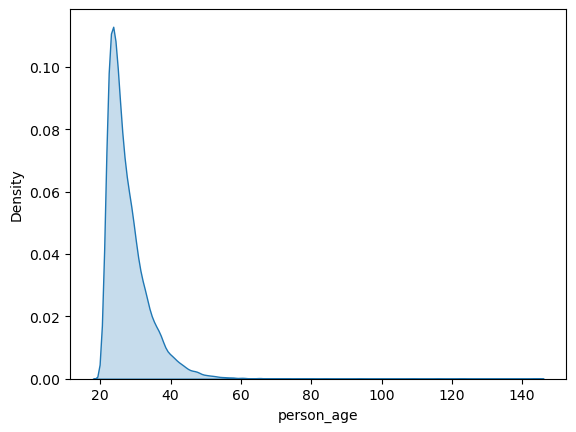

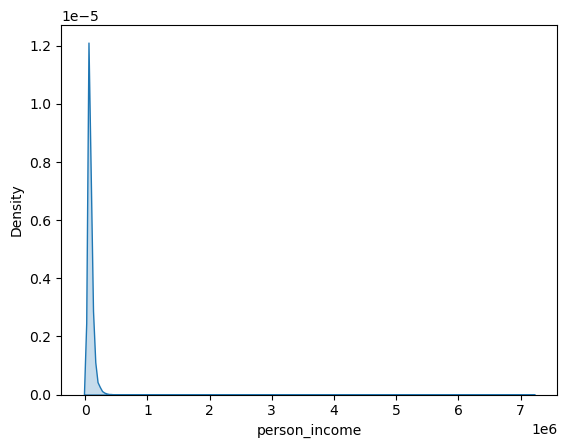

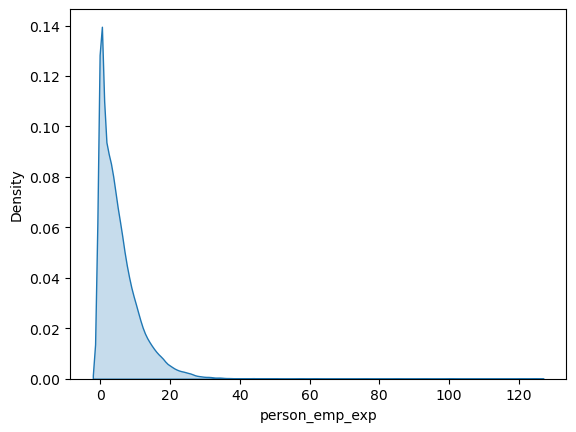

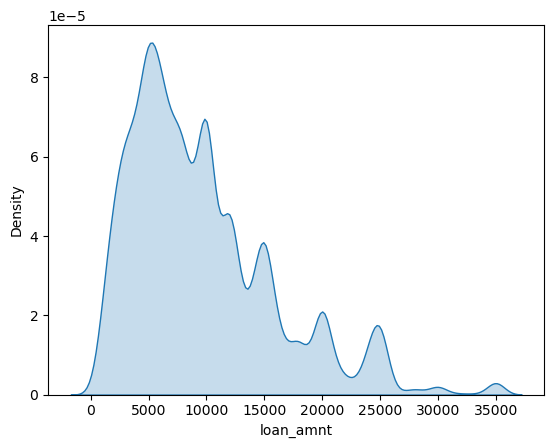

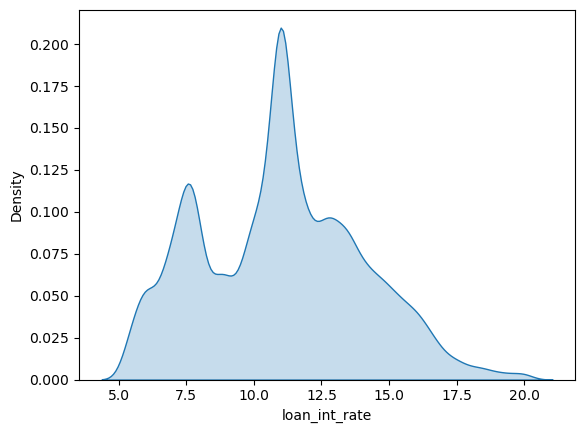

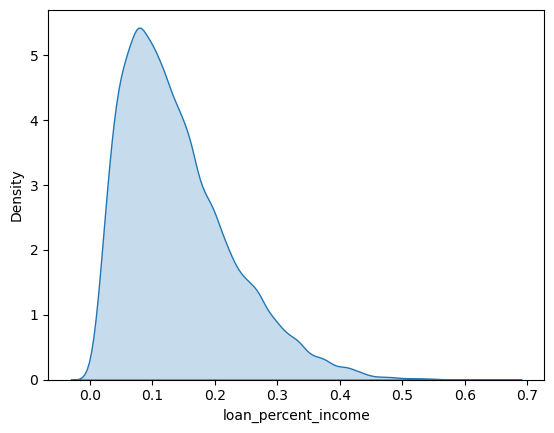

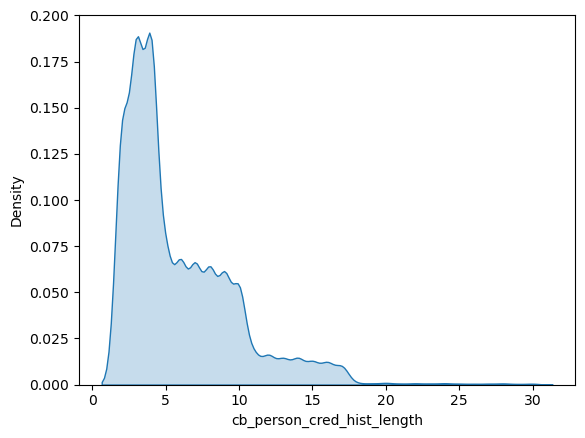

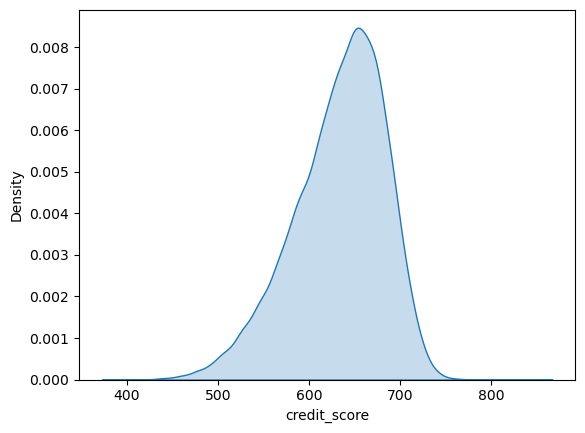

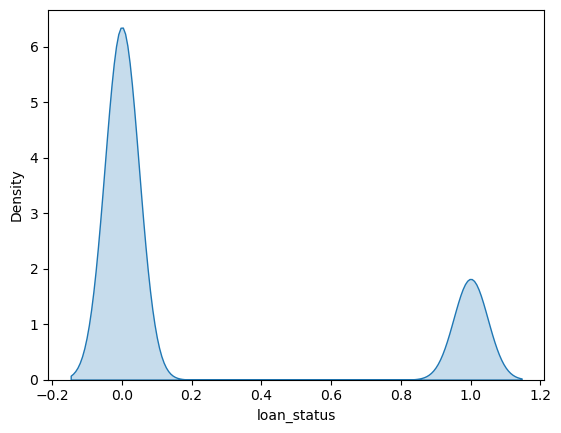

In [66]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns 
for col in numeric_cols:
    sns.kdeplot(df[col],fill=True) 
    plt.show()

In [67]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numeric_cols].skew())

person_age                     2.548154
person_income                 34.137583
person_emp_exp                 2.594917
loan_amnt                      1.179731
loan_int_rate                  0.213784
loan_percent_income            1.034512
cb_person_cred_hist_length     1.631720
credit_score                  -0.610261
loan_status                    1.336351
dtype: float64


In [68]:
df['person_age']=np.log1p(df['person_age'])
df['person_income']=np.log1p(df['person_income'])
df['person_emp_exp ']=np.log1p(df['person_emp_exp'])
df['loan_amnt']=np.log1p(df['loan_amnt'])
df['loan_percent_income']=np.log1p(df['loan_percent_income'])
df['cb_person_cred_hist_length']=np.log1p(df['cb_person_cred_hist_length'])
df['loan_status']=np.log1p(df['loan_status'])

In [69]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numeric_cols].skew())


person_age                    1.220204
person_income                 0.224018
person_emp_exp                2.594917
loan_amnt                    -0.438128
loan_int_rate                 0.213784
loan_percent_income           0.829301
cb_person_cred_hist_length    0.442656
credit_score                 -0.610261
loan_status                   1.336351
person_emp_exp               -0.122990
dtype: float64


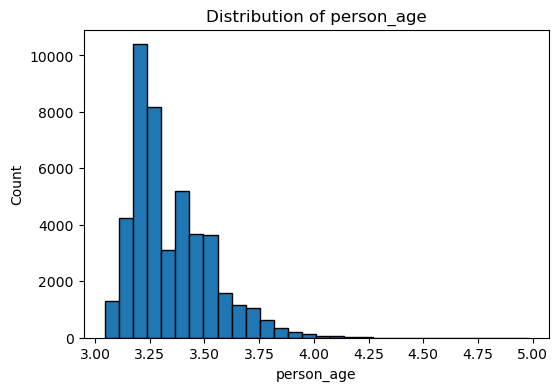

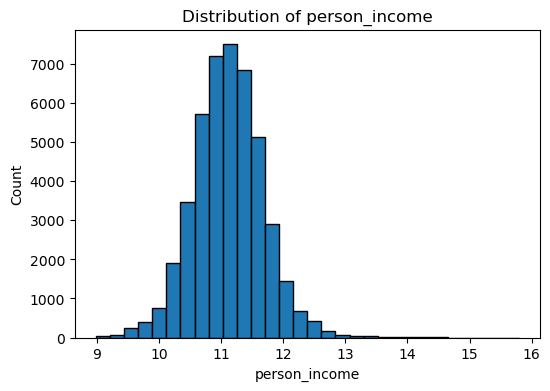

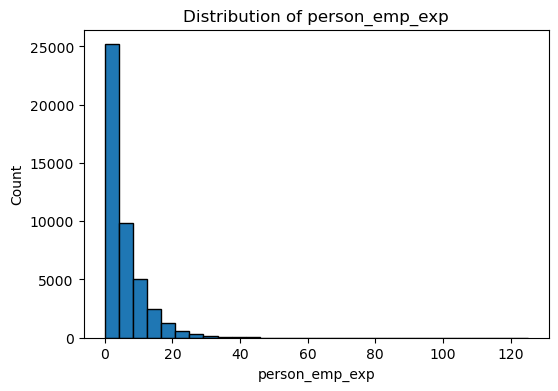

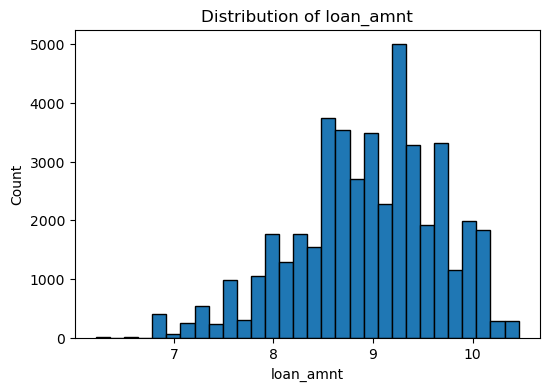

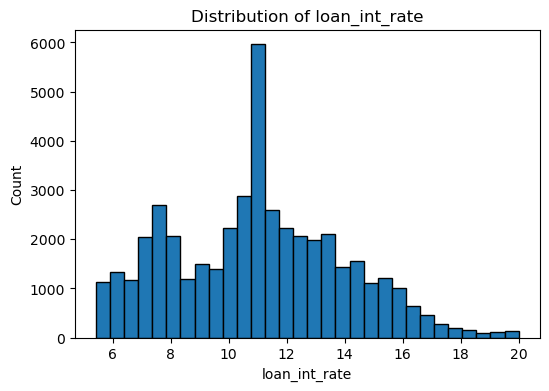

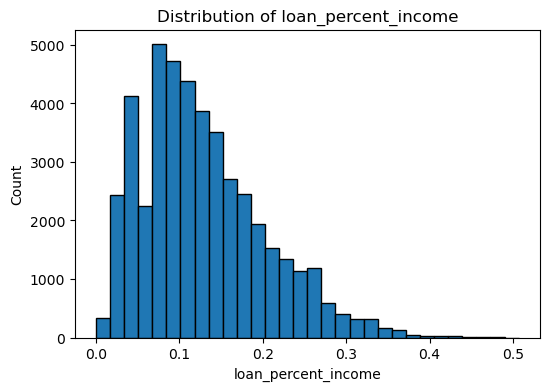

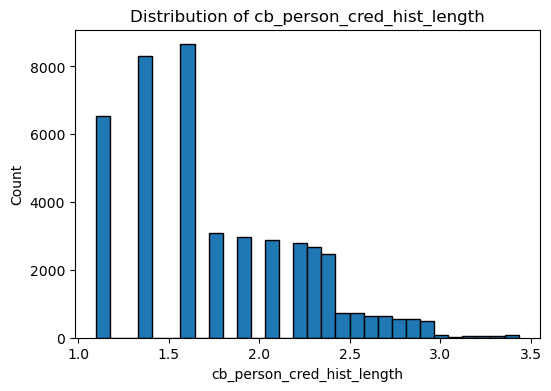

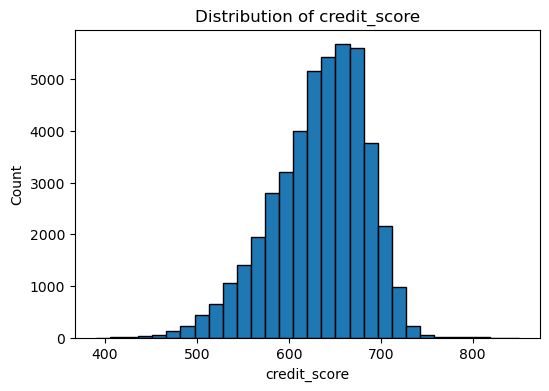

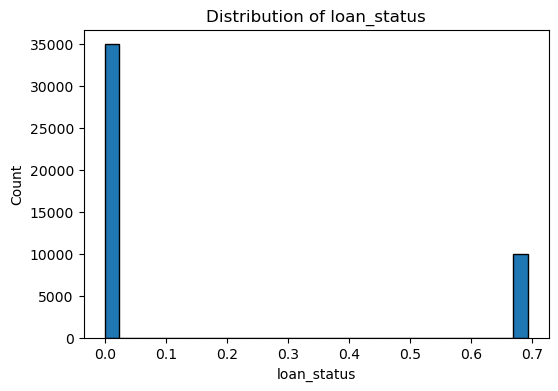

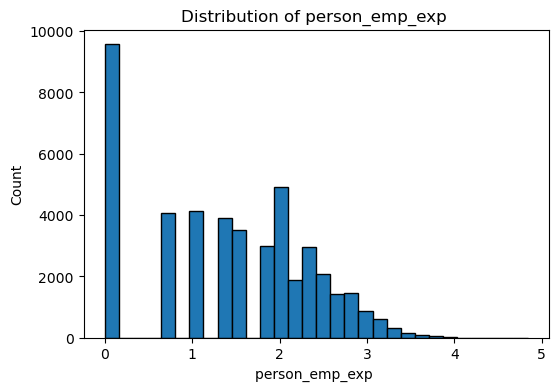

In [70]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns 
for col in numeric_cols: 
    plt.figure(figsize=(6,4)) 
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f"Distribution of {col}") 
    plt.xlabel(col) 
    plt.ylabel("Count")
    plt.show()

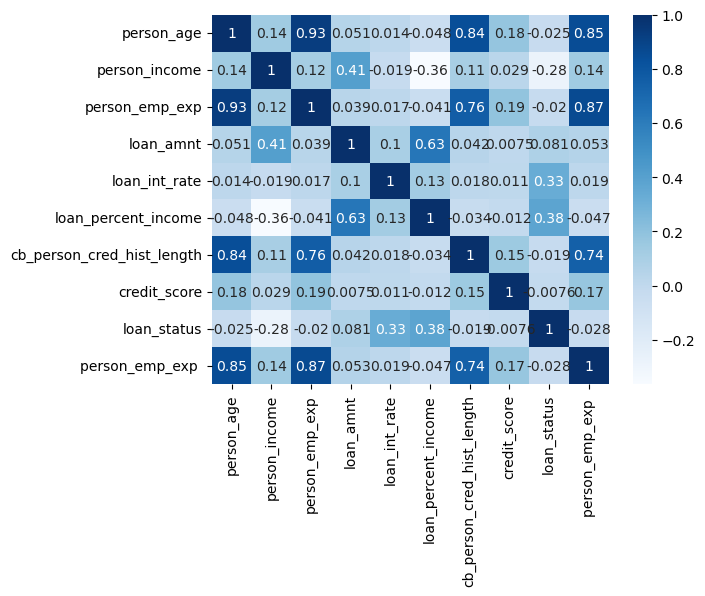

In [71]:
num_cols=df[numeric_cols]
sns.heatmap(num_cols.corr(),annot=True,cmap='Blues')
plt.show()

In [72]:
df.columns = df.columns.str.strip()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [74]:
from sklearn.preprocessing import LabelEncoder

for col in ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [75]:
print(df['loan_status'].dtype)
print(df['loan_status'].unique())

float64
[0.69314718 0.        ]


In [76]:
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x > 0 else 0)

In [82]:
X = df.drop('loan_status', axis=1)
y = df['loan_status'].astype(int)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [83]:
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9237777777777778
Precision: 0.8782857142857143
Recall: 0.7646766169154229
F1-Score: 0.8175531914893617
Confusion Matrix:
 [[6777  213]
 [ 473 1537]]


In [84]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status',
       'person_emp_exp'],
      dtype='object')

In [ ]:

new_applicant = pd.DataFrame([{
    'person_age': 35,
    'person_gender': 0,  
    'person_education': 0,
    'person_income': 55000,
    'person_emp_exp': 5,
    'person_home_ownership': 1,
    'loan_amnt': 20000,
    'loan_intent': 0,
    'loan_int_rate': 10,
    'loan_percent_income': 20000/55000*100,
    'cb_person_cred_hist_length': 10,
    'credit_score': 700,
    'previous_loan_defaults_on_file': 0
}])


new_applicant = new_applicant[X_train.columns]


approval_prob = rf.predict_proba(new_applicant)[:,1][0]
print("Loan Approval Probability:", round(approval_prob, 4))


Loan Approval Probability: 0.39
